In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #импортируем библиотеку pandas для обработки dataframe-ов
import random
pd.options.mode.chained_assignment = None 

Читаем CSV с основными данными

In [2]:
df = pd.read_csv('homicide-data.csv', encoding="unicode_escape")
df

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest
...,...,...,...,...,...,...,...,...,...,...,...,...
52174,Was-001380,20160908,WILLIAMS,EVAN,Black,29,Male,Washington,DC,38.828704,-77.002075,Closed by arrest
52175,Was-001381,20160913,SMITH,DEON,Black,19,Male,Washington,DC,38.822852,-77.001725,Open/No arrest
52176,Was-001382,20161114,WASHINGTON,WILLIE,Black,23,Male,Washington,DC,38.828025,-77.002511,Open/No arrest
52177,Was-001383,20161130,BARNES,MARCUS,Black,24,Male,Washington,DC,38.820476,-77.008640,Open/No arrest


Построим сдвоенную диаграмму с областями для жертв мужчин и женщин

In [3]:
male_age = df.query("victim_sex == 'Male' & victim_age != 'Unknown'")
male_age = male_age[['victim_age']].apply(pd.to_numeric)
female_age = df.query("victim_sex == 'Female' & victim_age != 'Unknown'")
female_age = female_age[['victim_age']].apply(pd.to_numeric)
x=range(0,100)
male_age = male_age.pivot_table(index = ['victim_age'], aggfunc ='size')
female_age = female_age.pivot_table(index = ['victim_age'], aggfunc ='size')
female_age[96] = 0
for i in range(98,101):
    female_age[i] = 0
female_age

victim_age
0      159
1      160
2       67
3       52
4       40
      ... 
97       1
96       0
98       0
99       0
100      0
Length: 101, dtype: int64

In [4]:
male_list = []
female_list = []

In [5]:
for i in range(0,100):
    male_list.append(male_age.values[i])
    female_list.append(female_age.values[i])
print(sum(male_list))
print(sum(female_list))

40445
7113


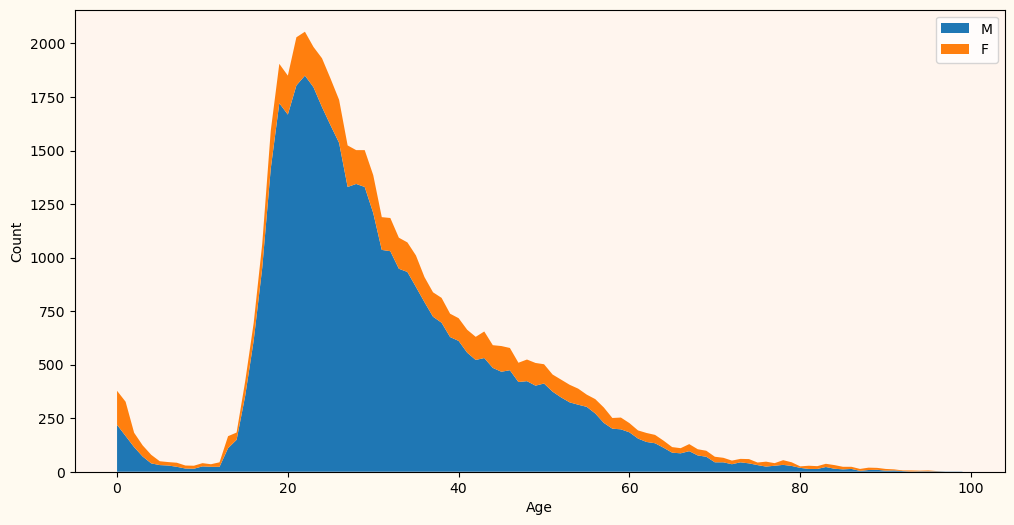

In [6]:
fig,ax=plt.subplots()
ax.stackplot(x,[male_list, female_list])
fig.set_figwidth(12) 
fig.set_figheight(6) 
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend('MF')

Создадим столбчатую диаграмму с распределение по возрастам жертв

In [7]:
male_between = []
female_between = []
unknwn_between = []

In [8]:
male_age_task2 = df.query("victim_sex == 'Male' & victim_age != 'Unknown'")
male_age_task2 = male_age_task2[['victim_age']].apply(pd.to_numeric)
male_between.append(male_age_task2.query("victim_age < 20 & victim_age >= 0").shape[0])
male_between.append(male_age_task2.query("victim_age < 40 & victim_age >= 20").shape[0])
male_between.append(male_age_task2.query("victim_age < 60 & victim_age >= 40").shape[0])
male_between.append(male_age_task2.query("victim_age < 80 & victim_age >= 60").shape[0])
male_between.append(male_age_task2.query("victim_age < 100 & victim_age >= 80").shape[0])
female_age_task2 = df.query("victim_sex == 'Female' & victim_age != 'Unknown'")
female_age_task2 = female_age_task2[['victim_age']].apply(pd.to_numeric)
female_between.append(female_age_task2.query("victim_age < 20 & victim_age >= 0").shape[0])
female_between.append(female_age_task2.query("victim_age < 40 & victim_age >= 20").shape[0])
female_between.append(female_age_task2.query("victim_age < 60 & victim_age >= 40").shape[0])
female_between.append(female_age_task2.query("victim_age < 80 & victim_age >= 60").shape[0])
female_between.append(female_age_task2.query("victim_age < 100 & victim_age >= 80").shape[0])
unknown_age_task2 = df.query("victim_sex == 'Unknown' & victim_age != 'Unknown'")
unknown_age_task2 = unknown_age_task2[['victim_age']].apply(pd.to_numeric)
unknwn_between.append(unknown_age_task2.query("victim_age < 20 & victim_age >= 0").shape[0])
unknwn_between.append(unknown_age_task2.query("victim_age < 40 & victim_age >= 20").shape[0])
unknwn_between.append(unknown_age_task2.query("victim_age < 60 & victim_age >= 40").shape[0])
unknwn_between.append(unknown_age_task2.query("victim_age < 80 & victim_age >= 60").shape[0])
unknwn_between.append(unknown_age_task2.query("victim_age < 100 & victim_age >= 80").shape[0])

In [9]:
X_task2 = np.arange(0,100,20)

Text(0, 0.5, 'Count')

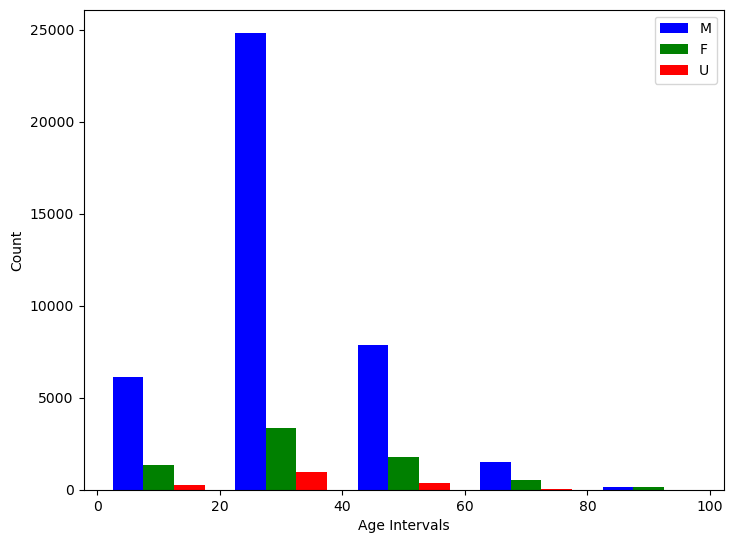

In [10]:
fig=plt.figure() 
ax=fig.add_axes([0,0,1,1])
ax.bar(X_task2+5, male_between, color = 'b', width = 5) 
ax.bar(X_task2+10, female_between, color = 'g', width = 5)
ax.bar(X_task2+15, unknwn_between, color = 'r', width = 5)
plt.legend('MFU')
plt.xlabel('Age Intervals')
plt.ylabel('Count')

In [11]:
male_task3 = df.query("victim_sex == 'Male' & victim_age != 'Unknown'")
male_task3 = male_task3[['victim_age']].apply(pd.to_numeric)
female_task3 = df.query("victim_sex == 'Female' & victim_age != 'Unknown'")
female_task3 = female_task3[['victim_age']].apply(pd.to_numeric)
unknown_task3 = df.query("victim_sex == 'Unknown' & victim_age != 'Unknown'")
unknown_task3 = unknown_task3[['victim_age']].apply(pd.to_numeric)
male_list_3 = male_task3.victim_age.tolist()
female_list_3 = female_task3.victim_age.tolist()
unknw_list_3 = unknown_task3.victim_age.tolist()
array_task3 = [male_list_3, female_list_3, unknw_list_3]
n_bins=20
colors=['green','blue','red']

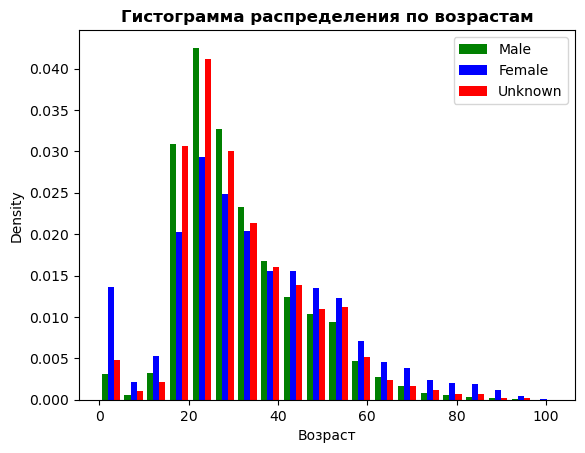

In [12]:
plt.hist(array_task3,n_bins,density=True, histtype='bar', color=colors, label=['Male','Female','Unknown'])
plt.legend(prop={'size':10}) 
plt.title('Гистограмма распределения по возрастам', fontweight="bold")
plt.xlabel('Возраст')
plt.ylabel('Density')
plt.show()

In [13]:
black_task4 = df.query("victim_race == 'Black' & victim_age != 'Unknown'")
black_task4 = black_task4[['victim_age']].apply(pd.to_numeric)
white_task4 = df.query("victim_race == 'White' & victim_age != 'Unknown'")
white_task4 = white_task4[['victim_age']].apply(pd.to_numeric)
hisp_task4 = df.query("victim_race == 'Hispanic' & victim_age != 'Unknown'")
hisp_task4 = hisp_task4[['victim_age']].apply(pd.to_numeric)
asian_task4 = df.query("victim_race == 'Hispanic' & victim_age != 'Unknown'")
asian_task4 = asian_task4[['victim_age']].apply(pd.to_numeric)
male_list_3 = male_task3.victim_age.tolist()
female_list_3 = female_task3.victim_age.tolist()
unknw_list_3 = unknown_task3.victim_age.tolist()
array_task4 = [black_task4.victim_age.tolist(), white_task4.victim_age.tolist(), hisp_task4.victim_age.tolist(), asian_task4.victim_age.tolist()]
n_bins=20
colors=['red','green','blue', 'purple']

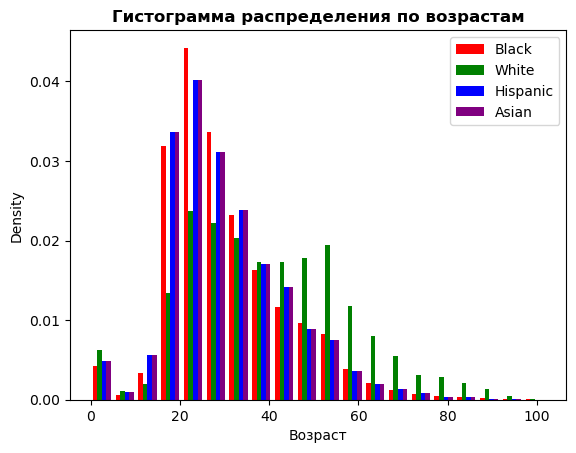

In [14]:
plt.hist(array_task4,n_bins,density=True, histtype='bar', color=colors, label=['Black','White','Hispanic', 'Asian'])
plt.legend(prop={'size':10}) 
plt.title('Гистограмма распределения по возрастам', fontweight="bold")
plt.xlabel('Возраст')
plt.ylabel('Density')
plt.show()

In [15]:
task4 = df['reported_date'].astype('string')

In [16]:
l_2007 = []
l_2008 = []
l_2009 = []
l_2010 = []
l_2011 = []
l_2012 = []
l_2013 = []
l_2014 = []
l_2015 = []
l_2016 = []
for i in task4:
    if i.startswith('2007'):
        l_2007.append(i)
    if i.startswith('2008'):
        l_2008.append(i)
    if i.startswith('2009'):
        l_2009.append(i)
    if i.startswith('2010'):
        l_2010.append(i)
    if i.startswith('2011'):
        l_2011.append(i)
    if i.startswith('2012'):
        l_2012.append(i)
    if i.startswith('2013'):
        l_2013.append(i)
    if i.startswith('2014'):
        l_2014.append(i)
    if i.startswith('2015'):
        l_2015.append(i)
    if i.startswith('2016'):
        l_2016.append(i)
data_task4 = [len(l_2007),len(l_2008),len(l_2009),len(l_2010),len(l_2011),len(l_2012),len(l_2013),len(l_2014),
             len(l_2015),len(l_2016)]

In [17]:
X_task4 = np.arange(2007,2017)

Text(0, 0.5, 'Count')

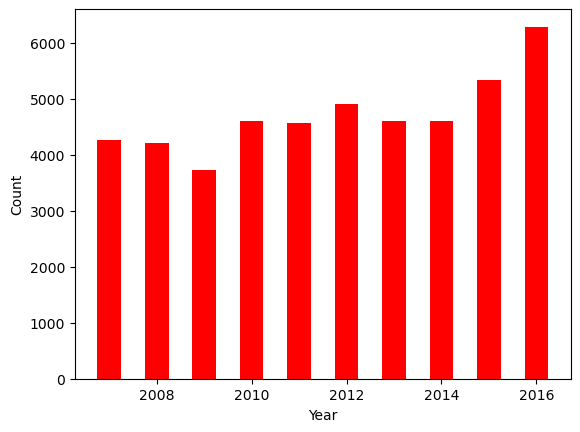

In [18]:
fig=plt.figure() 
ax=fig
plt.bar(X_task4, data_task4, color = 'r', width = 0.5) 
plt.xlabel('Year')
plt.ylabel('Count')

Доп задание:
